# Visual Correlation Table - US Minimum Wage by State

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\David Marimin\Documents\CV 2022 David Marimin Marketing\Projects\US Minimum Wage\Minimum Wage Data.csv")

act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["State.Minimum.Wage.2020.Dollars"]].rename(columns={"State.Minimum.Wage.2020.Dollars":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["State.Minimum.Wage.2020.Dollars"]].rename(columns={"State.Minimum.Wage.2020.Dollars":name}))

act_min_wage.head()

min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


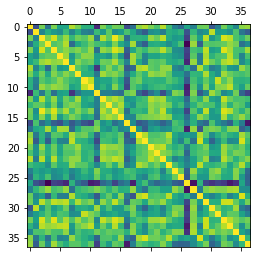

In [2]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

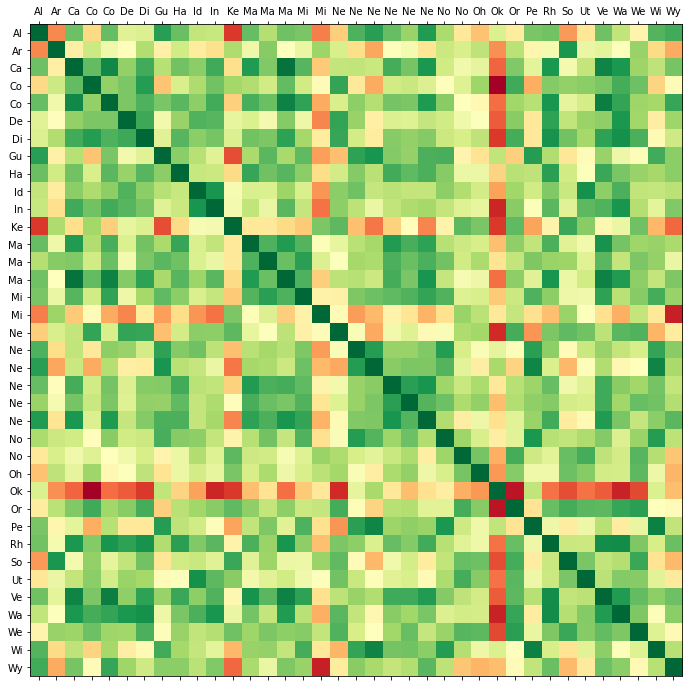

In [3]:
# To customize the plot: 
import matplotlib.pyplot as plt

labels = [c[:2] for c in min_wage_corr.columns]  # get abbv state names.

fig = plt.figure(figsize=(12,12))  # figure so we can add axis
ax = fig.add_subplot(111)  # define axis, so we can modify

ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)  # display the matrix

ax.set_xticks(np.arange(len(labels)))  # show them all!
ax.set_yticks(np.arange(len(labels)))  # show them all!

ax.set_xticklabels(labels)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)

plt.show()

In [4]:
# pip install lxml html5lib bs4
# on mac, run: /Applications/Python\ 3.7/Install\ Certificates.command

import pandas as pd
import requests

web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")

dfs = pd.read_html(web.text)

In [5]:
for df in dfs:
    print(df.head())  # one is states, the other territory

  State Name/District Postal Abbreviation Postal Code
0             Alabama                Ala.          AL
1              Alaska              Alaska          AK
2             Arizona               Ariz.          AZ
3            Arkansas                Ark.          AR
4          California              Calif.          CA
        Territory/Associate Abbreviation Postal Code
0            American Samoa          NaN          AS
1                      Guam         Guam          GU
2          Marshall Islands          NaN          MH
3                Micronesia          NaN          FM
4  Northern Mariana Islands          NaN          MP


In [6]:
state_abbv = dfs[0]
state_abbv.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [7]:
# Save the database from the website, because they might change information or bot security in the future
state_abbv.to_csv(r"C:\Users\David Marimin\Documents\CV 2022 David Marimin Marketing\Projects\US Minimum Wage\state_abbv.csv")

In [8]:
state_abbv = pd.read_csv(r"C:\Users\David Marimin\Documents\CV 2022 David Marimin Marketing\Projects\US Minimum Wage\state_abbv.csv")
state_abbv.head()

,Unnamed: 0,State Name/District,Postal Abbreviation,Postal Code
0,0,Alabama,Ala.,AL
1,1,Alaska,Alaska,AK
2,2,Arizona,Ariz.,AZ
3,3,Arkansas,Ark.,AR
4,4,California,Calif.,CA


In [9]:
state_abbv.to_csv(r"C:\Users\David Marimin\Documents\CV 2022 David Marimin Marketing\Projects\US Minimum Wage\state_abbv.csv", index = False)

In [10]:
state_abbv = pd.read_csv(r"C:\Users\David Marimin\Documents\CV 2022 David Marimin Marketing\Projects\US Minimum Wage\state_abbv.csv", index_col=0)
state_abbv.head()

,State Name/District,Postal Abbreviation,Postal Code
Unnamed: 0,,,
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [11]:
abbv_dict = state_abbv.to_dict()
abbv_dict

{'State Name/District': {0: 'Alabama',
  1: 'Alaska',
  2: 'Arizona',
  3: 'Arkansas',
  4: 'California',
  5: 'Colorado',
  6: 'Connecticut',
  7: 'Delaware',
  8: 'District of Columbia',
  9: 'Florida',
  10: 'Georgia',
  11: 'Hawaii',
  12: 'Idaho',
  13: 'Illinois',
  14: 'Indiana',
  15: 'Iowa',
  16: 'Kansas',
  17: 'Kentucky',
  18: 'Louisiana',
  19: 'Maine',
  20: 'Maryland',
  21: 'Massachusetts',
  22: 'Michigan',
  23: 'Minnesota',
  24: 'Mississippi',
  25: 'Missouri',
  26: 'Montana',
  27: 'Nebraska',
  28: 'Nevada',
  29: 'New Hampshire',
  30: 'New Jersey',
  31: 'New Mexico',
  32: 'New York',
  33: 'North Carolina',
  34: 'North Dakota',
  35: 'Ohio',
  36: 'Oklahoma',
  37: 'Oregon',
  38: 'Pennsylvania',
  39: 'Rhode Island',
  40: 'South Carolina',
  41: 'South Dakota',
  42: 'Tennessee',
  43: 'Texas',
  44: 'Utah',
  45: 'Vermont',
  46: 'Virginia',
  47: 'Washington',
  48: 'West Virginia',
  49: 'Wisconsin',
  50: 'Wyoming'},
 'Postal Abbreviation': {0: 'Ala.'

In [12]:
abbv_dict = abbv_dict['Postal Code']
abbv_dict

{0: 'AL',
 1: 'AK',
 2: 'AZ',
 3: 'AR',
 4: 'CA',
 5: 'CO',
 6: 'CT',
 7: 'DE',
 8: 'DC',
 9: 'FL',
 10: 'GA',
 11: 'HI',
 12: 'ID',
 13: 'IL',
 14: 'IN',
 15: 'IA',
 16: 'KS',
 17: 'KY',
 18: 'LA',
 19: 'ME',
 20: 'MD',
 21: 'MA',
 22: 'MI',
 23: 'MN',
 24: 'MS',
 25: 'MO',
 26: 'MT',
 27: 'NE',
 28: 'NV',
 29: 'NH',
 30: 'NJ',
 31: 'NM',
 32: 'NY',
 33: 'NC',
 34: 'ND',
 35: 'OH',
 36: 'OK',
 37: 'OR',
 38: 'PA',
 39: 'RI',
 40: 'SC',
 41: 'SD',
 42: 'TN',
 43: 'TX',
 44: 'UT',
 45: 'VT',
 46: 'VA',
 47: 'WA',
 48: 'WV',
 49: 'WI',
 50: 'WY'}